# Homework5

# Onur Poyraz 2016705069

## Part 1

### Question 1

Directed Graphical Model
<img src="1.JPG">

Factor Graph
<img src="2.JPG">

### Question 2

\begin{align}
\phi = & p(A,R,x_1=\hat{x_1}|x_0=\hat{x_0}) \propto p(x_1|x_0,A,R)p(A)p(R)\\
= &N(x_1;Ax_0,R)N(A;0,P)IG(R;\nu,\nu/\beta)\\
\propto & exp\big{(}-\frac{1}{2}\frac{x_1^2}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-\frac{1}{2}log2\pi R\big{)}\\
& exp\big{(}-\frac{1}{2}\frac{A^2}{P}-\frac{1}{2}log|2\pi P|\big{)}\\
& exp\big{(}-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}-log\Gamma(\nu)+\nu log(\nu / \beta)\big{)}\\
\end{align}

\begin{align}
log\phi&=-\frac{1}{2}\frac{x_1^2}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-\frac{1}{2}log2\pi R-\frac{1}{2}\frac{A^2}{P}-\frac{1}{2}log|2\pi P|-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}-log\Gamma(\nu)+\nu log(\nu/\beta)\\
&=-\frac{1}{2}\frac{x_1^2}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-\frac{1}{2}logR-\frac{1}{2}\frac{A^2}{P}-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}
\end{align}

\begin{align}
log\phi_A&=-\frac{1}{2}\frac{A^2}{P}\\
log\phi_R&=-(\nu+1+1/2)logR-\big{(}\frac{\nu}{\beta}+\frac{1}{2}x_1^2\big{)}\frac{1}{R}\\
log\phi_x&=x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}\\
\end{align}

In the question given;
\begin{align}
P&=1.2 \\
\nu&=0.4\\
\beta&=1.6x10^{-3}\\
\end{align}
So, individual factors become;
\begin{align}
log\phi_A&=-\frac{1}{2}\frac{A^2}{1.2}\\
log\phi_R&=-(0.4+1+1/2)logR-\big{(}\frac{1}{4x10^{-3}}+\frac{1}{2}x_1^2\big{)}\frac{1}{R}\\
log\phi_x&=x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}\\
\end{align}

### Question 3

\begin{align}
p(A|R,x_0,x_1) &\propto exp\big{(}-\frac{1}{2}\frac{A^2}{P}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}\big{)}\\
p(R|A,x_0,x_1) &\propto exp\big{(}-(\nu+1+1/2)logR-\big{(}\frac{\nu}{\beta}+\frac{1}{2}x_1^2\big{)}\frac{1}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}\big{)}\\
\end{align}

### Question 4

\begin{align}
p(A,R,x_0=1,x_1=-6)\\
\propto & exp\big{(}-\frac{1}{2}\frac{x_1^2}{R}+x_0x_1\frac{A}{R}-\frac{1}{2}\frac{x_0^2A^2}{R}-\frac{1}{2}log2\pi R\big{)}\\
& exp\big{(}-\frac{1}{2}\frac{A^2}{P}-\frac{1}{2}log|2\pi P|\big{)}\\
& exp\big{(}-(\nu+1)logR-\frac{\nu}{\beta}\frac{1}{R}-log\Gamma(\nu)+\nu log(\nu / \beta)\big{)}\\
\end{align}

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 300
plt.style.use('dark_background')

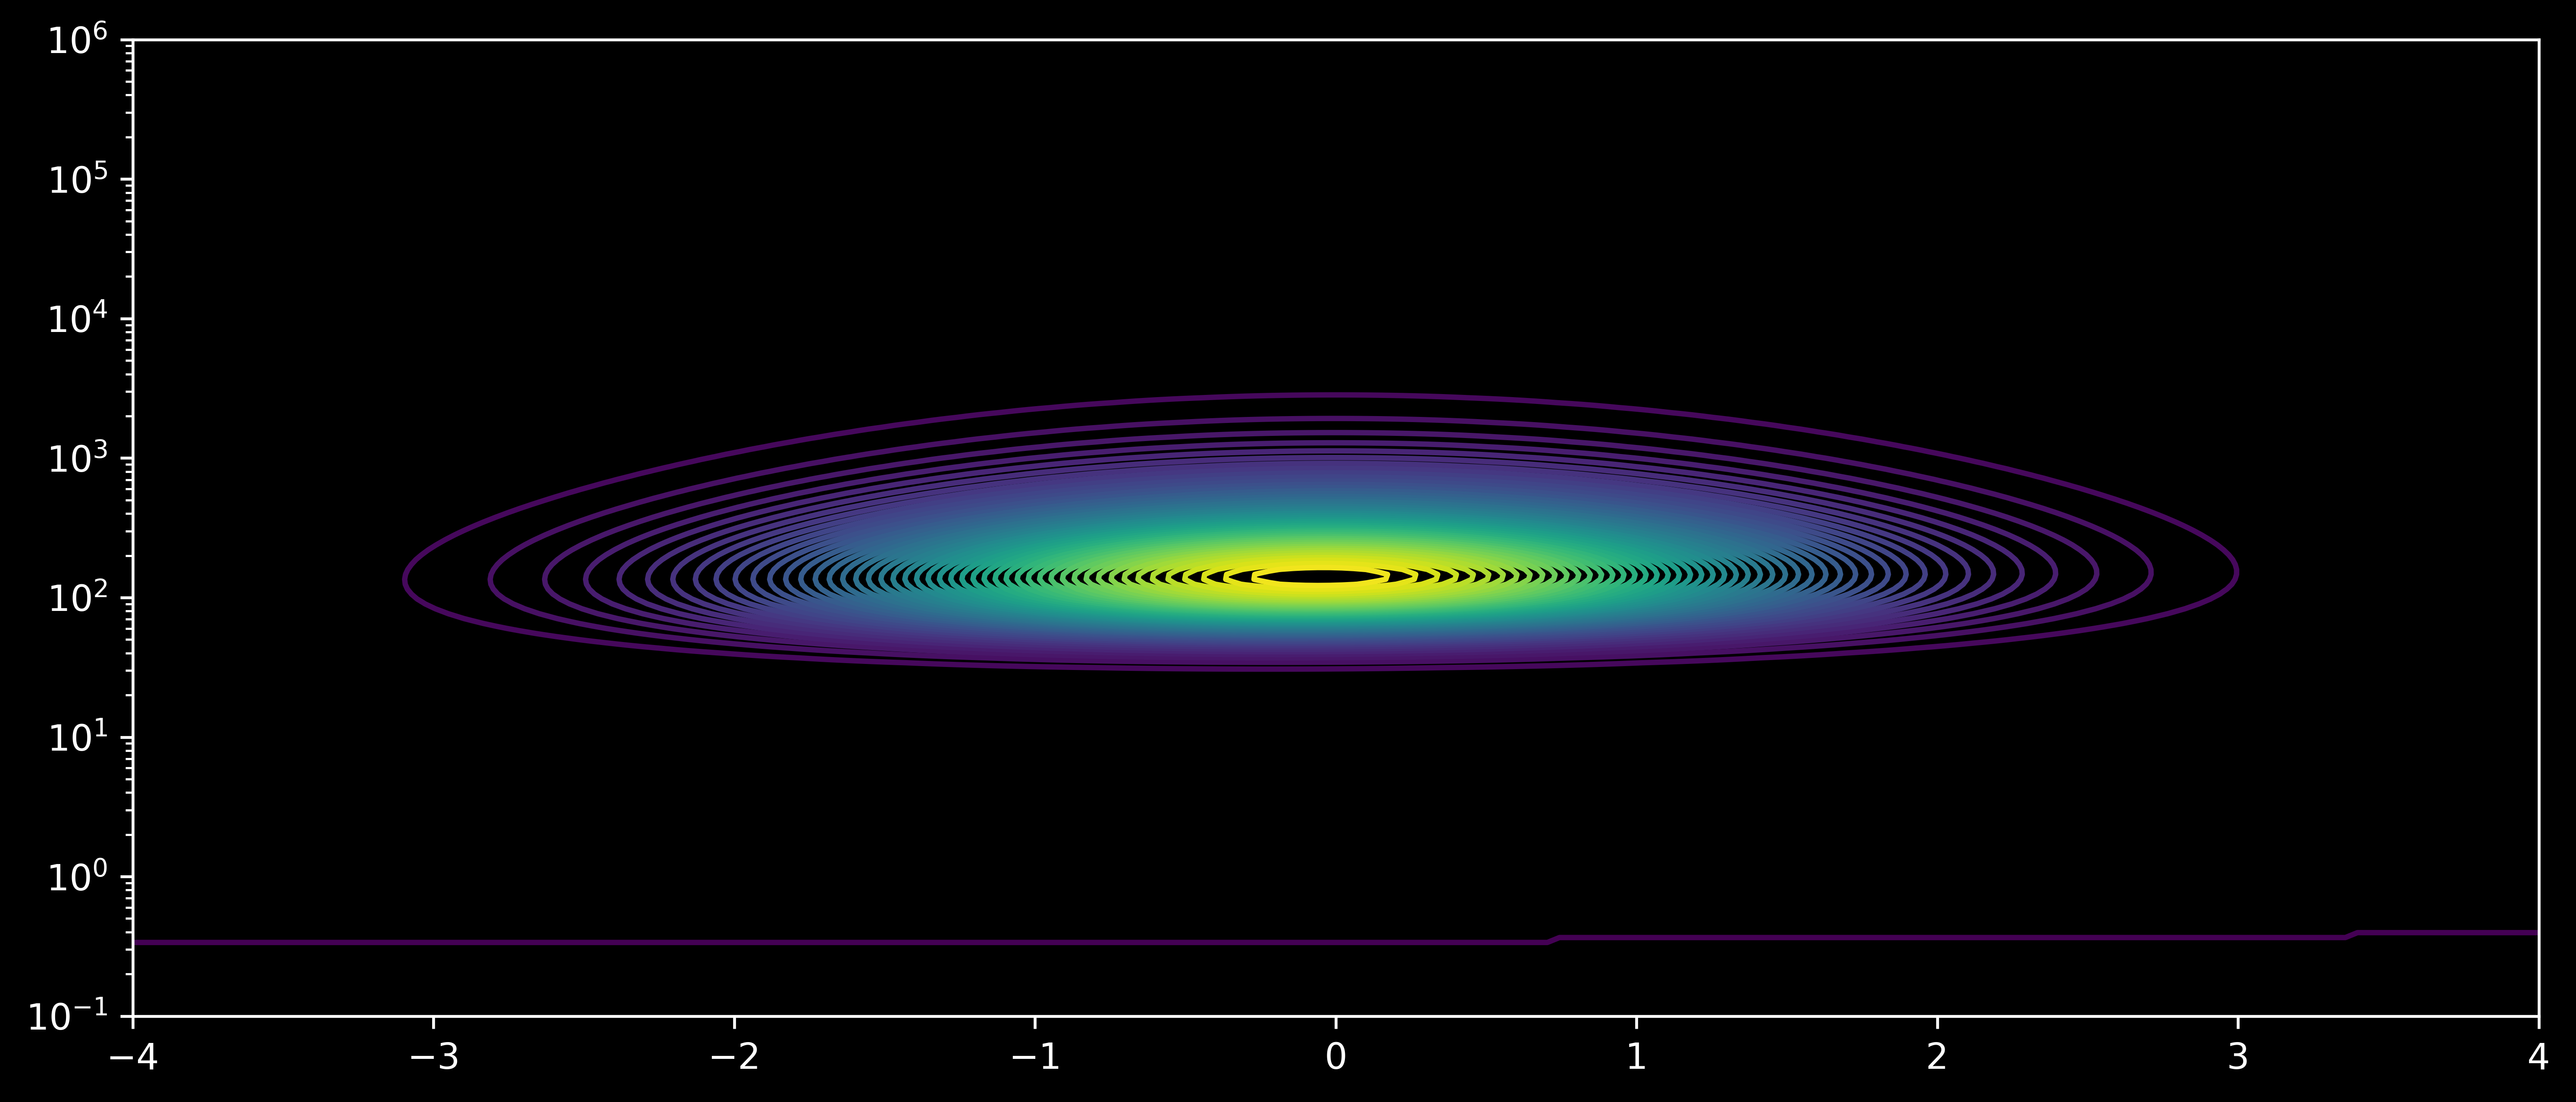

In [3]:
P = 1.2
nu = 0.4
beta = 0.0016
x0 = 1
x1 = -6

A = np.linspace(-4,4,200).tolist()
R = np.logspace(-1,6,200).tolist()
V = []
for r in R:
    Vprime = []
    for a in A:
        x = -(x1**2)/(2*r) + x0*x1*a/r -((a*x0)**2)/(2*r) - np.log(2*np.pi*r)/2
        y = -(a**2)/(2*P) - np.log(np.absolute(2*np.pi*P))/2
        z = -(nu+1)*np.log(r) - (nu/beta)*(1/r) - np.log(sps.gamma(nu)) + nu*np.log(nu/beta)
        Vprime.append(np.exp(x + y + z))
    V.append(Vprime)
    
V = np.array(V)
plt.figure(figsize=(12,5))
CS = plt.contour(A,R,V,50)
plt.yscale('log')
plt.show()

## Part2

### Question 1

$ R^* = \underset {R} {\text{argmax}} \ p(R|x_0, x_1, \theta) $ 
Let t denote the iteration step,

\begin{eqnarray}
q(A)^{(t)} &=& \text{exp}(\text{log}\phi(A, R = R^{t-1})) = p(A|R^{t-1}) \\
R^{(t)} &=& \text{argmax} E\{ \text{log}\phi(A, R) \}_{q(A)^{(t)}} 
\end{eqnarray}

In [4]:
def EM_for_R(R):
    P = 1.2
    nu = 0.4
    beta = 100
    x0 = 1
    x1 = -6
    invR = 1/R
    for i in range(100):
        sigma = 1/(1/P + x0**2*invR)
        mu = sigma*x0*x1*invR
        
        a = nu + 0.5
        b = x1**2/2 - x0*x1*mu + (x0**2)*(mu**2+sigma)/2 + nu/beta
        
        invR = a/b
        R = b/(a + 1)
    return R
print (EM_for_R(0.00001))

8.638399439098746


### Question 2

$ A^* = \underset {A} {\text{argmax}} \ p(A|x_0, x_1, \theta) $ 
Let t denote the iteration step,

\begin{eqnarray}
A^{(t)} &=& argmax E\{ \text{log}\phi (A, R)\}_{q(R)^{(t-1)}} \\
q(R)^{(t)} &=& \text{exp}(\text{log}\phi(A = A^{t-1}, R)) = p(R|A^{t})
\end{eqnarray}

In [5]:
def EM_for_A(A):
    P = 1.2
    nu = 0.4
    beta = 100
    x0 = 1
    x1 = -6
    for i in range(100):
        a = nu + 0.5
        b = x1**2/2 - x0*x1*A + (x0**2)*(A**2)/2 + nu/beta
        invR = a/b
        
        sigma = 1/(1/P + x0**2*invR)
        mu = sigma*x0*x1*invR
        
        A = mu
    return A
print (EM_for_A(0))
print (EM_for_A(-6))

-0.3845558972418147
-5.976313139142658


### Question3

In [6]:
def ICM(R,A):
    P = 1.2
    nu = 0.4
    beta = 100
    x0 = 1
    x1 = -6
    invR = 1/R
    for i in range(100):
        a = nu + 0.5
        b = nu/beta + x1**2/2 - x0*x1*A + (x0**2)/2
        
        sigma = 1/(1/P + x0**2*invR)
        mu = sigma*x0*x1*invR
        
        invR = a/b
        R = b/(a + 1)
        A = mu
    return R,A
print (ICM(0.00001,0))
print (ICM(0.00001,-6))

(8.558973997819452, -0.3736582340238404)
(8.558973997819452, -0.3736582340238404)


### Question4

8.638399439098746 -0.3704347574553939


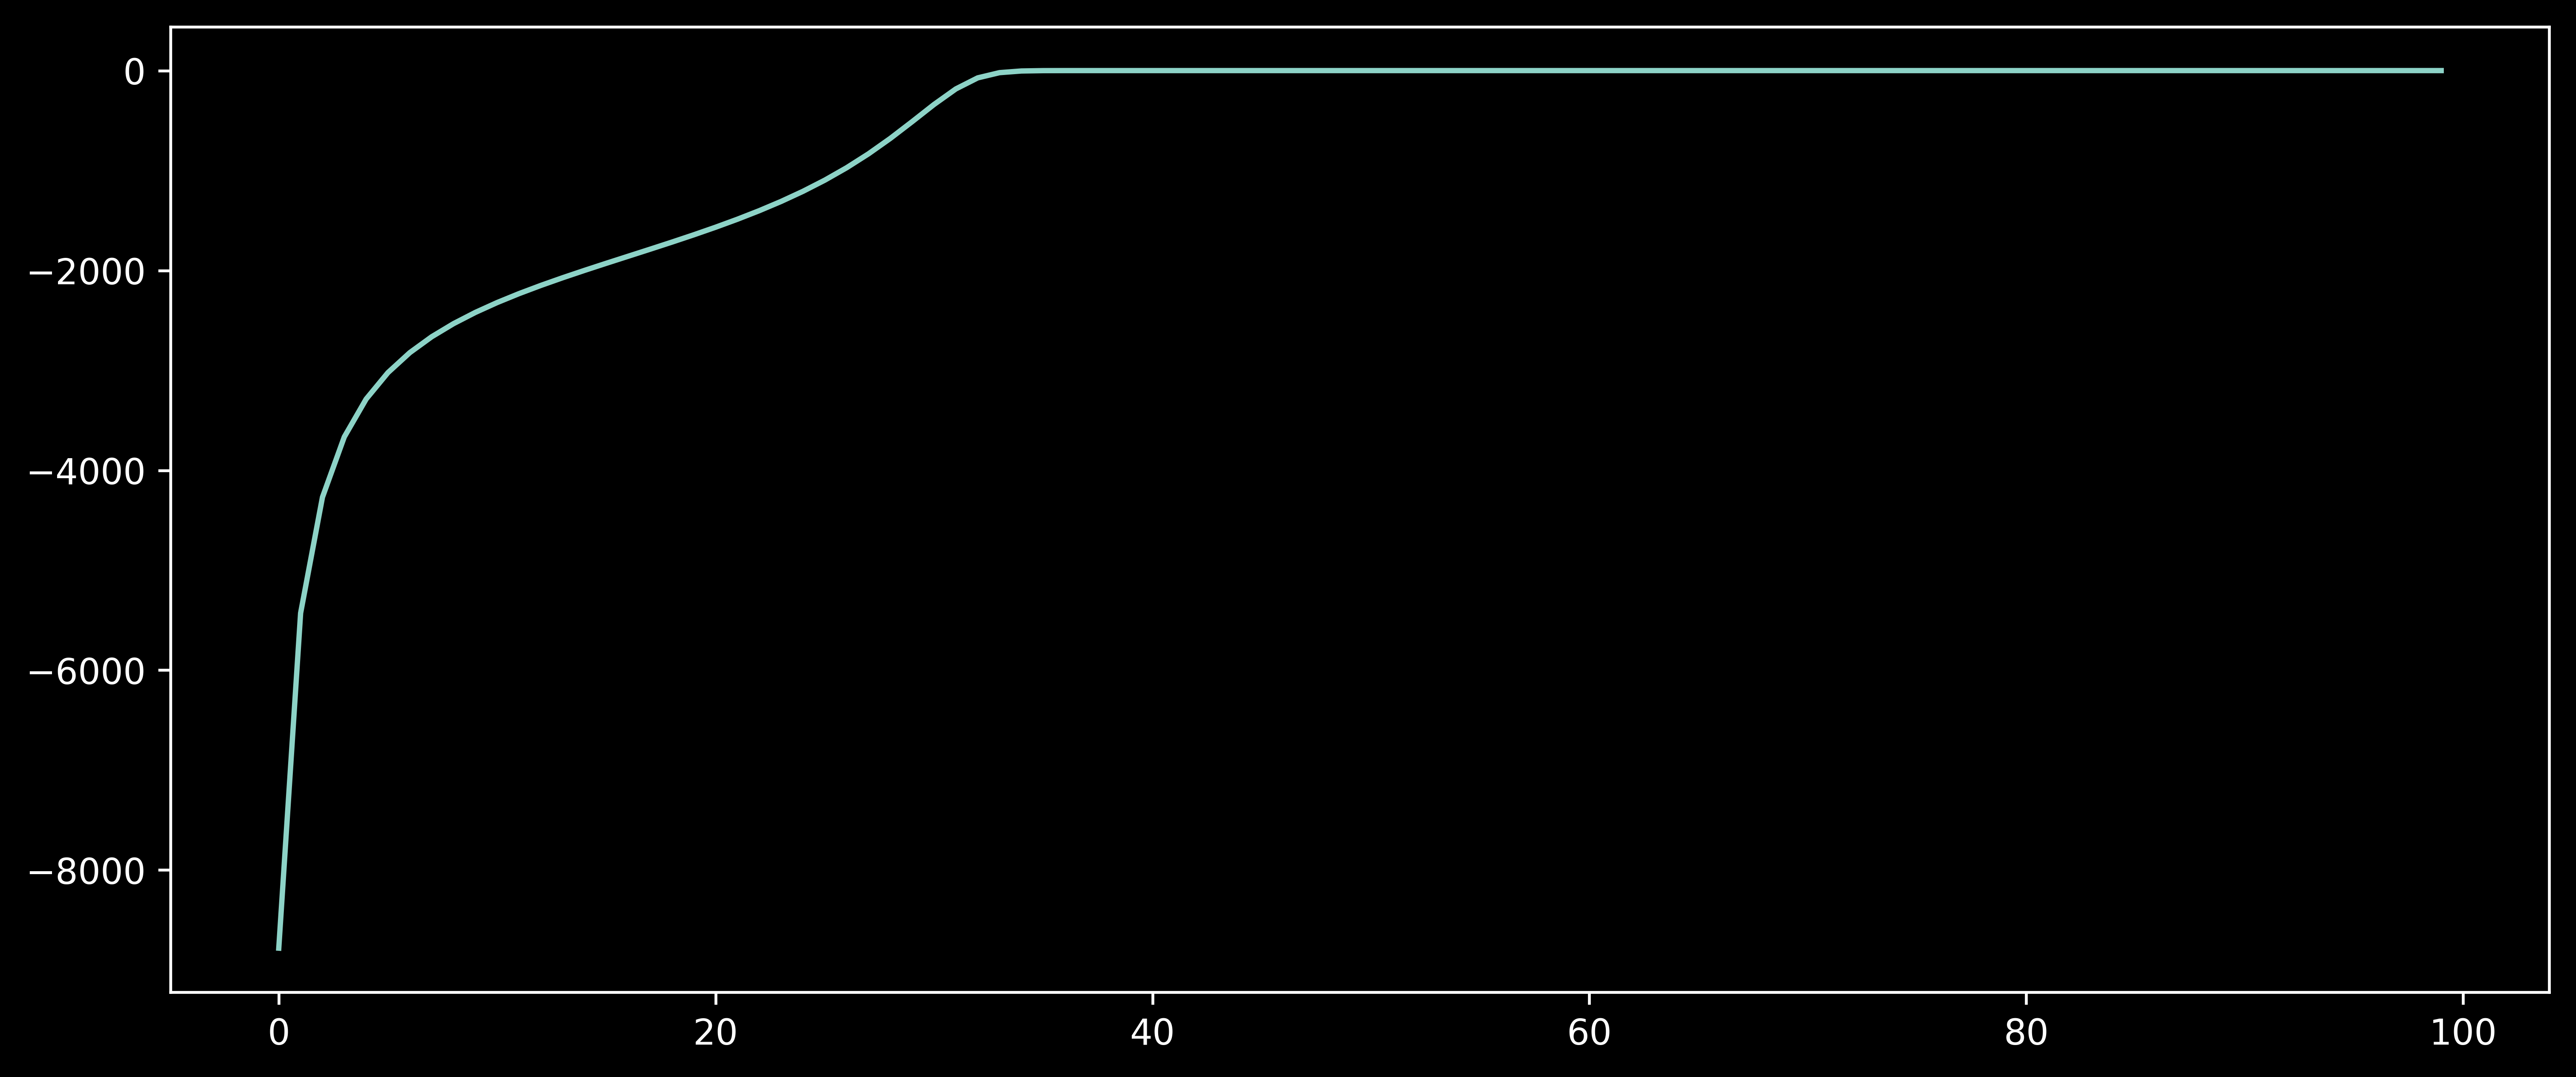

In [7]:
def VB(R,A):
    P = 1.2
    nu = 0.4
    beta = 100
    x0 = 1
    x1 = -6
    invR = 1/R
    bound = []
    for i in range(100):
        sigma = 1/(1/P + x0**2*invR)
        mu = sigma*x0*x1*invR
        
        a = nu + 0.5
        b = nu/beta + x1**2/2 - x0*x1*mu + (x0**2)*(mu**2 + sigma)/2
        
        invR = a/b
        R = b/(a + 1)
        A = mu
        
        q_AR = -0.5*(x1**2)*invR + x0*x1*A*invR - 0.5*(x0**2)*(A**2)*invR - 0.5*np.log(R) - 0.5*(A**2)/P  - (nu+1)*np.log(R) - nu*invR/beta
        q_A = -0.5*(1/P + (x0**2)*invR)*A + x0*x1*invR*A
        q_R = -1*(nu + 1.5)*np.log(R) - (nu/beta + 0.5*x1**2 - x0*x1*A + 0.5*(x0**2)*(A**2))*invR
        bound.append(q_AR - (q_A + q_R))
    return R, A, bound
R, A, bound = VB(0.00001, 0)
print (R, A)
plt.figure(figsize=(12,5))
plt.plot(bound)
plt.show()